Starting with this code, loading in a CSV to a dataframe can be as simple as:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ZILLOW-C252_MSPFCO.csv')
print(df.head())

         Date     Value
0  2016-07-31  807.9414
1  2016-06-30  797.5535
2  2016-05-31  809.5157
3  2016-04-30  818.5681
4  2016-03-31  800.9157


Notice that we have no decent index again. We can fix that like we did before doing:

In [2]:
df=df.set_index('Date')

Now, let's say we want to send this back to a CSV, we can do:

In [3]:
df.to_csv('newcsv2.csv')

With pandas we can quickly make a plot of the data.

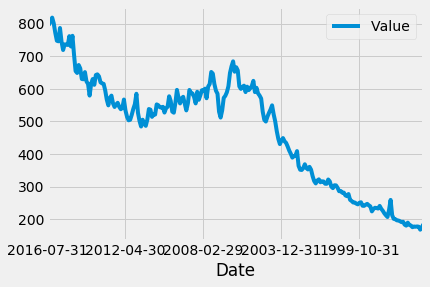

In [4]:
df.plot()
plt.show()

We notice that it is ploting from most recent data to the oldest data. This is not how we would like such data to be presented. We can quickly flip the dataset using panda indexing.

Lets start by looking at the 25 most recent data point

In [6]:
print(df[:25])

               Value
Date                
2016-07-31  807.9414
2016-06-30  797.5535
2016-05-31  809.5157
2016-04-30  818.5681
2016-03-31  800.9157
2016-02-29  771.4921
2016-01-31  747.5905
2015-12-31  745.8960
2015-11-30  786.6922
2015-10-31  744.3815
2015-09-30  719.1234
2015-08-31  736.4989
2015-07-31  736.1203
2015-06-30  734.6554
2015-05-31  761.6679
2015-04-30  730.1186
2015-03-31  762.7666
2015-02-28  704.9493
2014-12-31  654.5523
2014-11-30  648.7748
2014-10-31  673.1492
2014-09-30  662.6267
2014-08-31  630.2345
2014-07-31  629.4594
2014-06-30  651.3413


We can notice that this is the value reported at the end of each month. Let's say we only care about the value reported at the end of every third month. We could use indexing like this:

In [7]:
print(df[:25:3])

               Value
Date                
2016-07-31  807.9414
2016-04-30  818.5681
2016-01-31  747.5905
2015-10-31  744.3815
2015-07-31  736.1203
2015-04-30  730.1186
2014-12-31  654.5523
2014-09-30  662.6267
2014-06-30  651.3413


Alternatively, we could look at the data provided with year spacing.

In [8]:
print(df[::12])

               Value
Date                
2016-07-31  807.9414
2015-07-31  736.1203
2014-06-30  651.3413
2013-06-30  615.2628
2012-06-30  541.8987
2011-06-30  484.4020
2010-06-30  543.6748
2009-06-30  572.6300
2008-06-30  590.9401
2007-06-30  594.4301
2006-06-30  652.5614
2005-06-30  624.5646
2004-06-30  549.3914
2003-06-30  400.8241
2002-06-30  360.6274
2001-06-30  321.8108
2000-06-30  270.7787
1999-06-30  244.5099
1998-06-30  217.9388
1997-05-31  192.2811
1996-05-31  174.5560


Finally, we could use this indexing to flip our data and created a sensable plot.

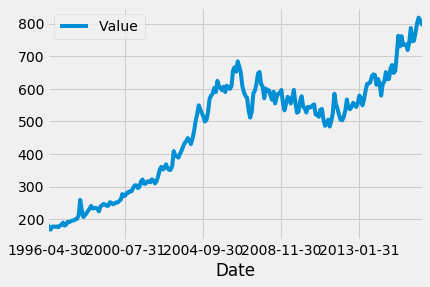

In [9]:
df[::-1].plot()
plt.show()

We can extract this data in a variety of ways. This is a Pandas tutorial, so if we can use Pandas, we shall. Let's check out the read_html from Pandas. It's not being called "experimental" anymore, but I would still label this as expirimental. The standard and quality of the other IO modules is very high and dependable. This read_html is not quite up to par, but I still say it's very impressive and useful code, and just plain cool. The way it works is you just simply feed in a URL, and Pandas will extract the dataframe worthy date from tables into a dataframe. This means, unlike the other typical methods you will usually use, read_html ends up reading into a list of dataframes. This isn't the only one that is different, but it is different. First, in order to use read_html, we need html5lib. Open up cmd.exe or your terminal and do: pip install html5lib. Now, we can make our first attempt by doing:

In [31]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
print(fiddy_states)

[         0              1               2               3                  4
0   Sl no.  Abbreviations      State Name         Capital     Became a State
1        1             AL         Alabama      Montgomery  December 14, 1819
2        2             AK          Alaska          Juneau    January 3, 1959
3        3             AZ         Arizona         Phoenix  February 14, 1912
4        4             AR        Arkansas     Little Rock      June 15, 1836
5        5             CA      California      Sacramento  September 9, 1850
6        6             CO        Colorado          Denver     August 1, 1876
7        7             CT     Connecticut        Hartford    January 9, 1788
8        8             DE        Delaware           Dover   December 7, 1787
9        9             FL         Florida     Tallahassee      March 3, 1845
10      10             GA         Georgia         Atlanta    January 2, 1788
11      11             HI          Hawaii        Honolulu    August 21, 195

That's more output than I am going to post here, but you get the idea. At least some of this data is what we want, and it looks like the first dataframe is off to a good start. So let's do:

In [32]:
print(fiddy_states[0])

         0              1               2               3                  4
0   Sl no.  Abbreviations      State Name         Capital     Became a State
1        1             AL         Alabama      Montgomery  December 14, 1819
2        2             AK          Alaska          Juneau    January 3, 1959
3        3             AZ         Arizona         Phoenix  February 14, 1912
4        4             AR        Arkansas     Little Rock      June 15, 1836
5        5             CA      California      Sacramento  September 9, 1850
6        6             CO        Colorado          Denver     August 1, 1876
7        7             CT     Connecticut        Hartford    January 9, 1788
8        8             DE        Delaware           Dover   December 7, 1787
9        9             FL         Florida     Tallahassee      March 3, 1845
10      10             GA         Georgia         Atlanta    January 2, 1788
11      11             HI          Hawaii        Honolulu    August 21, 1959

Yep, that's looking good, we want column 0. So, we want to iterate through column 0 of fiddy_states[0]. Remember, right now, fiddy_states is a list of dataframes, and fiddy_states[0] is the first dataframe. To reference column 0 then, we do fiddy_states[0][0]. One is a list index, which returns a dataframe. The other is a column within the dataframe. Next, we notice the first item in column 0 is the word "abbreviation," which we don't want. We can correct the header and indexing as so:

In [33]:
##Use only the first Table
fiddy_states=fiddy_states[0]

###Correct the header
fiddy_states.columns = fiddy_states.iloc[0]
fiddy_states=fiddy_states.drop(fiddy_states.index[0])

###Corrrect the indexing
fiddy_states=fiddy_states.set_index('Sl no.')

print(fiddy_states)

0      Abbreviations      State Name         Capital     Became a State
Sl no.                                                                 
1                 AL         Alabama      Montgomery  December 14, 1819
2                 AK          Alaska          Juneau    January 3, 1959
3                 AZ         Arizona         Phoenix  February 14, 1912
4                 AR        Arkansas     Little Rock      June 15, 1836
5                 CA      California      Sacramento  September 9, 1850
6                 CO        Colorado          Denver     August 1, 1876
7                 CT     Connecticut        Hartford    January 9, 1788
8                 DE        Delaware           Dover   December 7, 1787
9                 FL         Florida     Tallahassee      March 3, 1845
10                GA         Georgia         Atlanta    January 2, 1788
11                HI          Hawaii        Honolulu    August 21, 1959
12                ID           Idaho           Boise       July 

Now we can issolate any part of this table. We are interested in the Abbrevations and can look at them using the header.

In [35]:
print(fiddy_states["Abbreviations"])

Sl no.
1     AL
2     AK
3     AZ
4     AR
5     CA
6     CO
7     CT
8     DE
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: Abbreviations, dtype: object
